<a href="https://colab.research.google.com/github/duongtrinh295/MeetingAppFull/blob/main/LAB_Verson_Com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

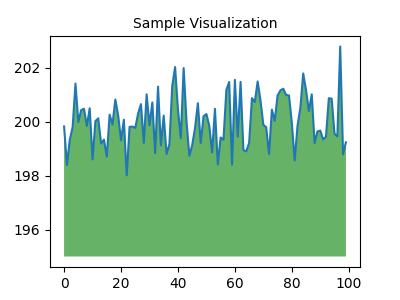

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Kích thước dữ liệu huấn luyện:", x_train.shape)
print("Kích thước dữ liệu kiểm tra:", x_test.shape)

x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)


model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(datagen.flow(x_train, y_train, batch_size=32),
          validation_data=(x_test, y_test),
          epochs=3)

model.save('my_model.keras')